In [ ]:
# TODO: include start and end of feature, include prefix and suffix info

In [ ]:
# Read book: Data Without Labels (Manning Publ.)

In [ ]:
# https://python-charts.com/correlation/clustermap-seaborn/

In [1]:
import collections, os

import numpy as np
import pandas as pd
import seaborn as sns

In [49]:
LEX_CUT_OFF = 4

files = [
         'nouns_adjectives.csv', 
         'infa_qal.csv',
         'infc_qal_lamed_he.csv', 
         'infc_qal_triliteral.csv', 
         'niph_hiph_pe_yod.csv', 
         'ptca_qal.csv', 
         'ptcp_qal.csv',
         'hiphil_triliteral_with_hireq.csv'
]
path = '../data'

In [50]:
#collect tuples
# (spelling info, lexeme)

scroll_book_dict = collections.defaultdict(lambda: collections.defaultdict(list))

for file in files:
    dat = pd.read_csv(os.path.join(path, file), sep='\t')

    feature_name = file.split('.')[0]
    print(feature_name)
    
    dat = dat[dat.scroll != 'SP']
    
    # split 1QIsaa in two halves
    dat['scroll2'] = [scr + '_I' if scr == '1Qisaa' and chapter < 34 else scr + '_II' if scr == '1Qisaa' and chapter >= 34 else scr for scr, chapter in zip(dat.scroll, dat.chapter)]
    
    if feature_name == 'hiphil_triliteral_with_hireq':
        dat = dat[dat.has_hireq == '1']
        
    if feature_name == 'nouns_adjectives':
        dat['lex_type'] = dat.lex + '_' + dat.type
        lex_vl_counts = pd.crosstab(dat.lex_type, dat.vowel_letter).T

        lex_vl = lex_vl_counts.idxmax()
        lex_vl_df = pd.DataFrame(lex_vl)
        lex_vl_df.columns = ['lex_vl']
        dat = pd.merge(dat, lex_vl_df, how='left', on=['lex_type'])

        dat.loc[dat['lex_vl'] != 'W', 'lex_vl'] = 'NONW'
        
      
    for idx, row in dat.iterrows():
        
        scroll = row.scroll2
        book = row.book
        lex = row.lex
        typ = row.type
        has_vl = row.has_vowel_letter
       
        has_suffix = str(int(row.has_hloc) or int(row.has_nme) or int(row.has_prs))
        
        if feature_name == 'nouns_adjectives':
            spelling_info = '_'.join([feature_name, typ, row.lex_vl, str(has_vl), has_suffix])
            feature_info = (feature_name + '_' + typ + '_' + row.lex_vl, lex)
        else:
            spelling_info = '_'.join([feature_name, typ, str(has_vl), has_suffix])
            feature_info = (feature_name + '_' + typ, lex)
        
        scroll_book_dict[scroll + '_' + book][feature_info].append(spelling_info)
        

nouns_adjectives
infa_qal
infc_qal_lamed_he
infc_qal_triliteral
niph_hiph_pe_yod
ptca_qal
ptcp_qal
hiphil_triliteral_with_hireq


In [51]:
all_features = set()
book_feature_counts = collections.defaultdict(int)

for scr_book, feat_lex_dict in scroll_book_dict.items():
    features_in_one_book = collections.defaultdict(int)
    
    for (feature, lex), spelling_list in feat_lex_dict.items():
        feature_count = collections.Counter(spelling_list)
        all_features.update(spelling_list)
        for feature, count in feature_count.items():
            features_in_one_book[feature] += min(LEX_CUT_OFF, count)
           
        book_feature_counts[scr_book] = features_in_one_book

In [52]:
sorted_features = sorted(list(all_features))

In [53]:
sorted_features

['hiphil_triliteral_with_hireq_last_0_0',
 'hiphil_triliteral_with_hireq_last_0_1',
 'hiphil_triliteral_with_hireq_last_1_0',
 'hiphil_triliteral_with_hireq_last_1_1',
 'infa_qal_last_0_0',
 'infa_qal_last_1_0',
 'infc_qal_lamed_he_nme_0_1',
 'infc_qal_lamed_he_nme_1_1',
 'infc_qal_triliteral_last_0_0',
 'infc_qal_triliteral_last_0_1',
 'infc_qal_triliteral_last_1_0',
 'niph_hiph_pe_yod_first_0_0',
 'niph_hiph_pe_yod_first_0_1',
 'niph_hiph_pe_yod_first_1_0',
 'niph_hiph_pe_yod_first_1_1',
 'nouns_adjectives_first_NONW_0_0',
 'nouns_adjectives_first_NONW_0_1',
 'nouns_adjectives_first_NONW_1_0',
 'nouns_adjectives_first_NONW_1_1',
 'nouns_adjectives_first_W_0_0',
 'nouns_adjectives_first_W_0_1',
 'nouns_adjectives_first_W_1_0',
 'nouns_adjectives_first_W_1_1',
 'nouns_adjectives_last_NONW_0_0',
 'nouns_adjectives_last_NONW_0_1',
 'nouns_adjectives_last_NONW_1_0',
 'nouns_adjectives_last_NONW_1_1',
 'nouns_adjectives_last_W_0_0',
 'nouns_adjectives_last_W_0_1',
 'nouns_adjectives_last_W

In [54]:
features = {}

for scr_book, feature_counts in book_feature_counts.items():
    counts_list = []
    for feat in sorted_features:
        counts_list.append(feature_counts.get(feat, 0))
    
    if sum(counts_list) > 80:
        features[scr_book] = counts_list
    
counts = pd.DataFrame(features).T
counts.columns = sorted_features

In [55]:
# remove columns with sum lower than 11
counts = counts[counts.columns[counts.sum()>10]]

In [56]:
counts.columns

Index(['hiphil_triliteral_with_hireq_last_0_0',
       'hiphil_triliteral_with_hireq_last_0_1',
       'hiphil_triliteral_with_hireq_last_1_0',
       'hiphil_triliteral_with_hireq_last_1_1', 'infa_qal_last_0_0',
       'infa_qal_last_1_0', 'infc_qal_lamed_he_nme_0_1',
       'infc_qal_lamed_he_nme_1_1', 'infc_qal_triliteral_last_0_0',
       'infc_qal_triliteral_last_1_0', 'niph_hiph_pe_yod_first_0_0',
       'niph_hiph_pe_yod_first_0_1', 'niph_hiph_pe_yod_first_1_0',
       'niph_hiph_pe_yod_first_1_1', 'nouns_adjectives_first_NONW_0_0',
       'nouns_adjectives_first_NONW_0_1', 'nouns_adjectives_first_NONW_1_0',
       'nouns_adjectives_first_NONW_1_1', 'nouns_adjectives_first_W_0_0',
       'nouns_adjectives_first_W_0_1', 'nouns_adjectives_first_W_1_0',
       'nouns_adjectives_first_W_1_1', 'nouns_adjectives_last_NONW_0_0',
       'nouns_adjectives_last_NONW_0_1', 'nouns_adjectives_last_NONW_1_0',
       'nouns_adjectives_last_NONW_1_1', 'nouns_adjectives_last_W_0_0',
       'noun

In [57]:
counts.head()

,hiphil_triliteral_with_hireq_last_0_0,hiphil_triliteral_with_hireq_last_0_1,hiphil_triliteral_with_hireq_last_1_0,hiphil_triliteral_with_hireq_last_1_1,infa_qal_last_0_0,infa_qal_last_1_0,infc_qal_lamed_he_nme_0_1,infc_qal_lamed_he_nme_1_1,infc_qal_triliteral_last_0_0,infc_qal_triliteral_last_1_0,...,nouns_adjectives_single_W_1_0,nouns_adjectives_single_W_1_1,ptca_qal_first_0_0,ptca_qal_first_0_1,ptca_qal_first_1_0,ptca_qal_first_1_1,ptcp_qal_last_0_0,ptcp_qal_last_0_1,ptcp_qal_last_1_0,ptcp_qal_last_1_1
MT_Genesis,3,3,44,8,12,13,11,21,57,1,...,33,19,81,58,12,4,0,11,13,8
MT_Exodus,4,1,47,11,13,7,20,20,40,0,...,40,15,77,59,9,0,1,11,15,4
MT_Leviticus,6,2,54,17,7,4,7,13,13,0,...,27,6,37,28,5,0,1,4,14,8
MT_Numbers,6,5,46,7,8,6,4,15,39,2,...,30,11,56,56,6,2,2,14,13,15
MT_Deuteronomy,5,11,65,37,16,11,10,13,36,0,...,34,21,85,52,12,2,2,8,23,21


In [71]:
# DIVIDE BY ROW_SUMS
# Every book has the same weight

row_sums = counts.sum(axis=1)
counts_norm = counts.divide(row_sums, axis='rows')

counts_norm.shape

(48, 46)

In [59]:
#counts_norm per feature

countsT = counts.T
row_sumsT = countsT.sum(axis=1)
counts_normT = countsT.divide(row_sumsT, axis='rows')
counts_norm_per_feature = counts_normT.T


In [60]:
counts_norm_per_feature.sum(axis=0)

hiphil_triliteral_with_hireq_last_0_0    1.0
hiphil_triliteral_with_hireq_last_0_1    1.0
hiphil_triliteral_with_hireq_last_1_0    1.0
hiphil_triliteral_with_hireq_last_1_1    1.0
infa_qal_last_0_0                        1.0
infa_qal_last_1_0                        1.0
infc_qal_lamed_he_nme_0_1                1.0
infc_qal_lamed_he_nme_1_1                1.0
infc_qal_triliteral_last_0_0             1.0
infc_qal_triliteral_last_1_0             1.0
niph_hiph_pe_yod_first_0_0               1.0
niph_hiph_pe_yod_first_0_1               1.0
niph_hiph_pe_yod_first_1_0               1.0
niph_hiph_pe_yod_first_1_1               1.0
nouns_adjectives_first_NONW_0_0          1.0
nouns_adjectives_first_NONW_0_1          1.0
nouns_adjectives_first_NONW_1_0          1.0
nouns_adjectives_first_NONW_1_1          1.0
nouns_adjectives_first_W_0_0             1.0
nouns_adjectives_first_W_0_1             1.0
nouns_adjectives_first_W_1_0             1.0
nouns_adjectives_first_W_1_1             1.0
nouns_adje

In [61]:
# APPLY TF-IDF
# See also https://en.wikipedia.org/wiki/Tf%E2%80%93idf

#TF-IDF(t, d) = tf(t, d) * log (N / df(t))
#tf(t, d) is the frequency of term t in document d.
#N is the total number of documents.
#df(t) is the number of documents containing t.

N = counts.shape[0]

df_t = np.count_nonzero(counts, axis = 0)

idf = np.log(N / df_t)

counts_tf_idf = counts *idf

In [62]:
row_sums_tf_idf = counts_tf_idf.sum(axis=1)
counts_tf_idf_norm = counts_tf_idf.divide(row_sums_tf_idf, axis='rows')

In [63]:
from scipy.stats import zscore
counts_z = counts.apply(zscore)
#print(counts_z)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
counts_standard = sc.fit_transform(counts)


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

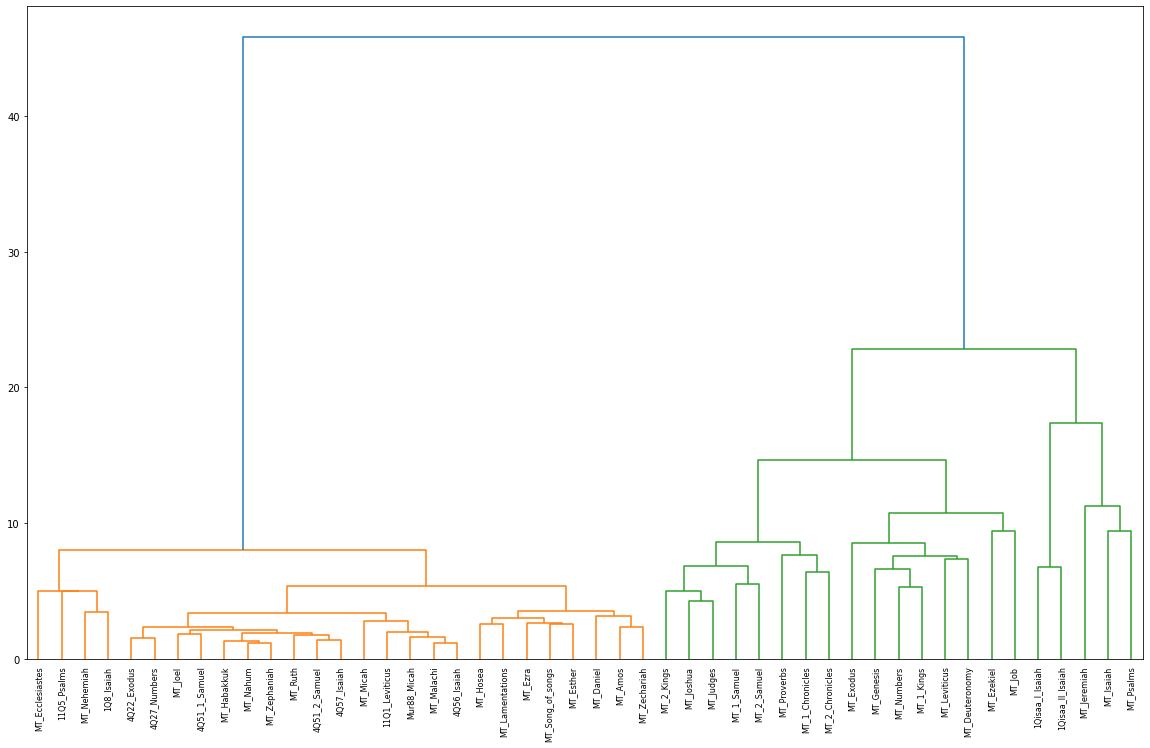

In [65]:
linkage_data = linkage(counts_standard, method='ward', metric='euclidean')

plt.figure(figsize=(20, 12))
dendrogram(linkage_data, labels=counts.index)
plt.show()

In [66]:
import os
os.getcwd()

'C:\\Users\\geitb\\Kopenhagen\\KopenhagenResearch\\scripts_research\\hebrew_spelling_variation\\notebooks'

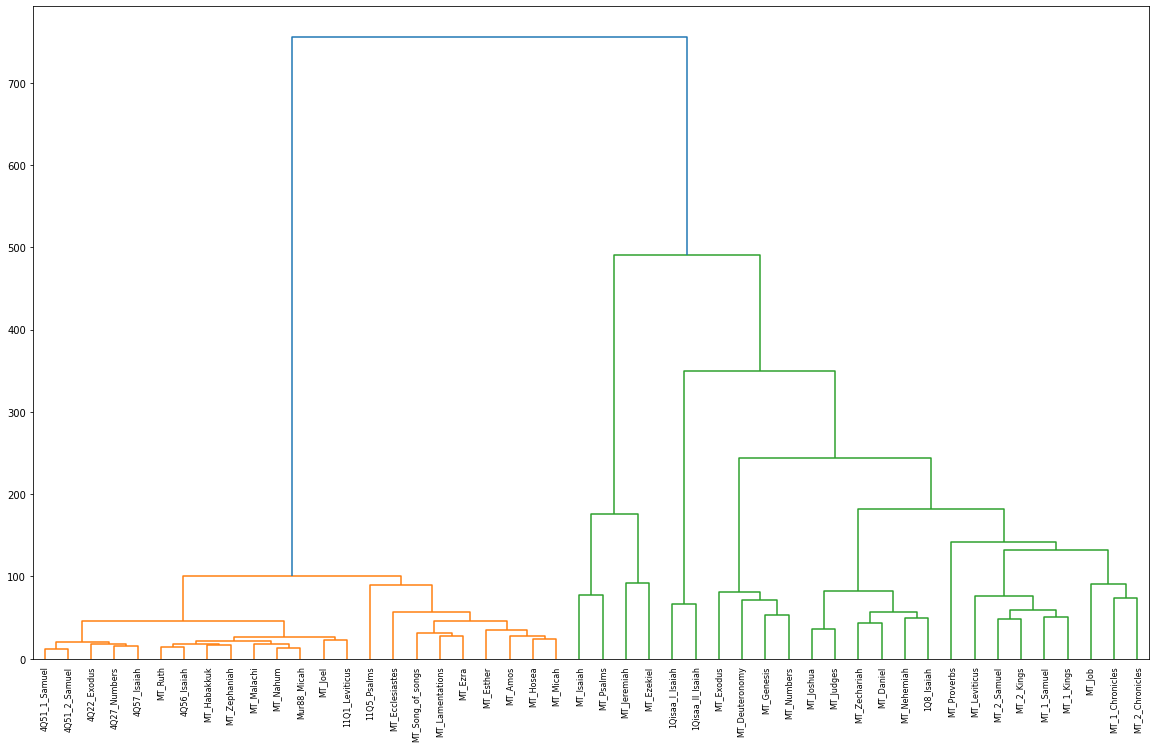

In [67]:
linkage_data = linkage(counts, method='ward', metric='euclidean')

plt.figure(figsize=(20, 12))
dendrogram(linkage_data, labels=counts.index)
plt.show()

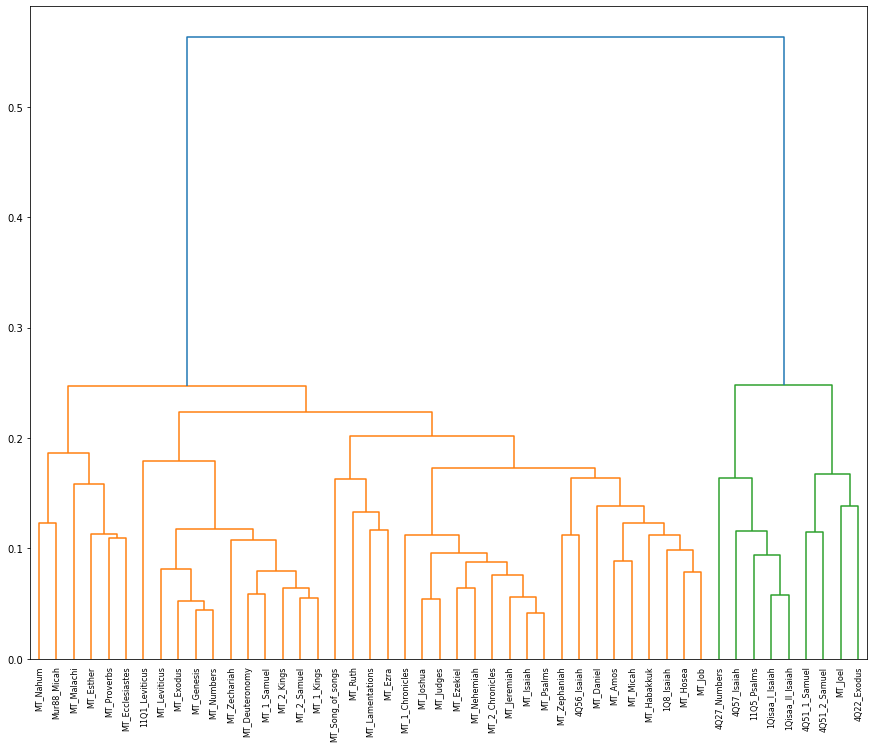

In [68]:
linkage_data = linkage(counts_norm, method='ward', metric='euclidean')

plt.figure(figsize=(15, 12))
dendrogram(linkage_data, labels=counts.index)
#plt.show()

plt.savefig(f'hierarch_clust_counts_norm_lex_cut_off{LEX_CUT_OFF}.png')

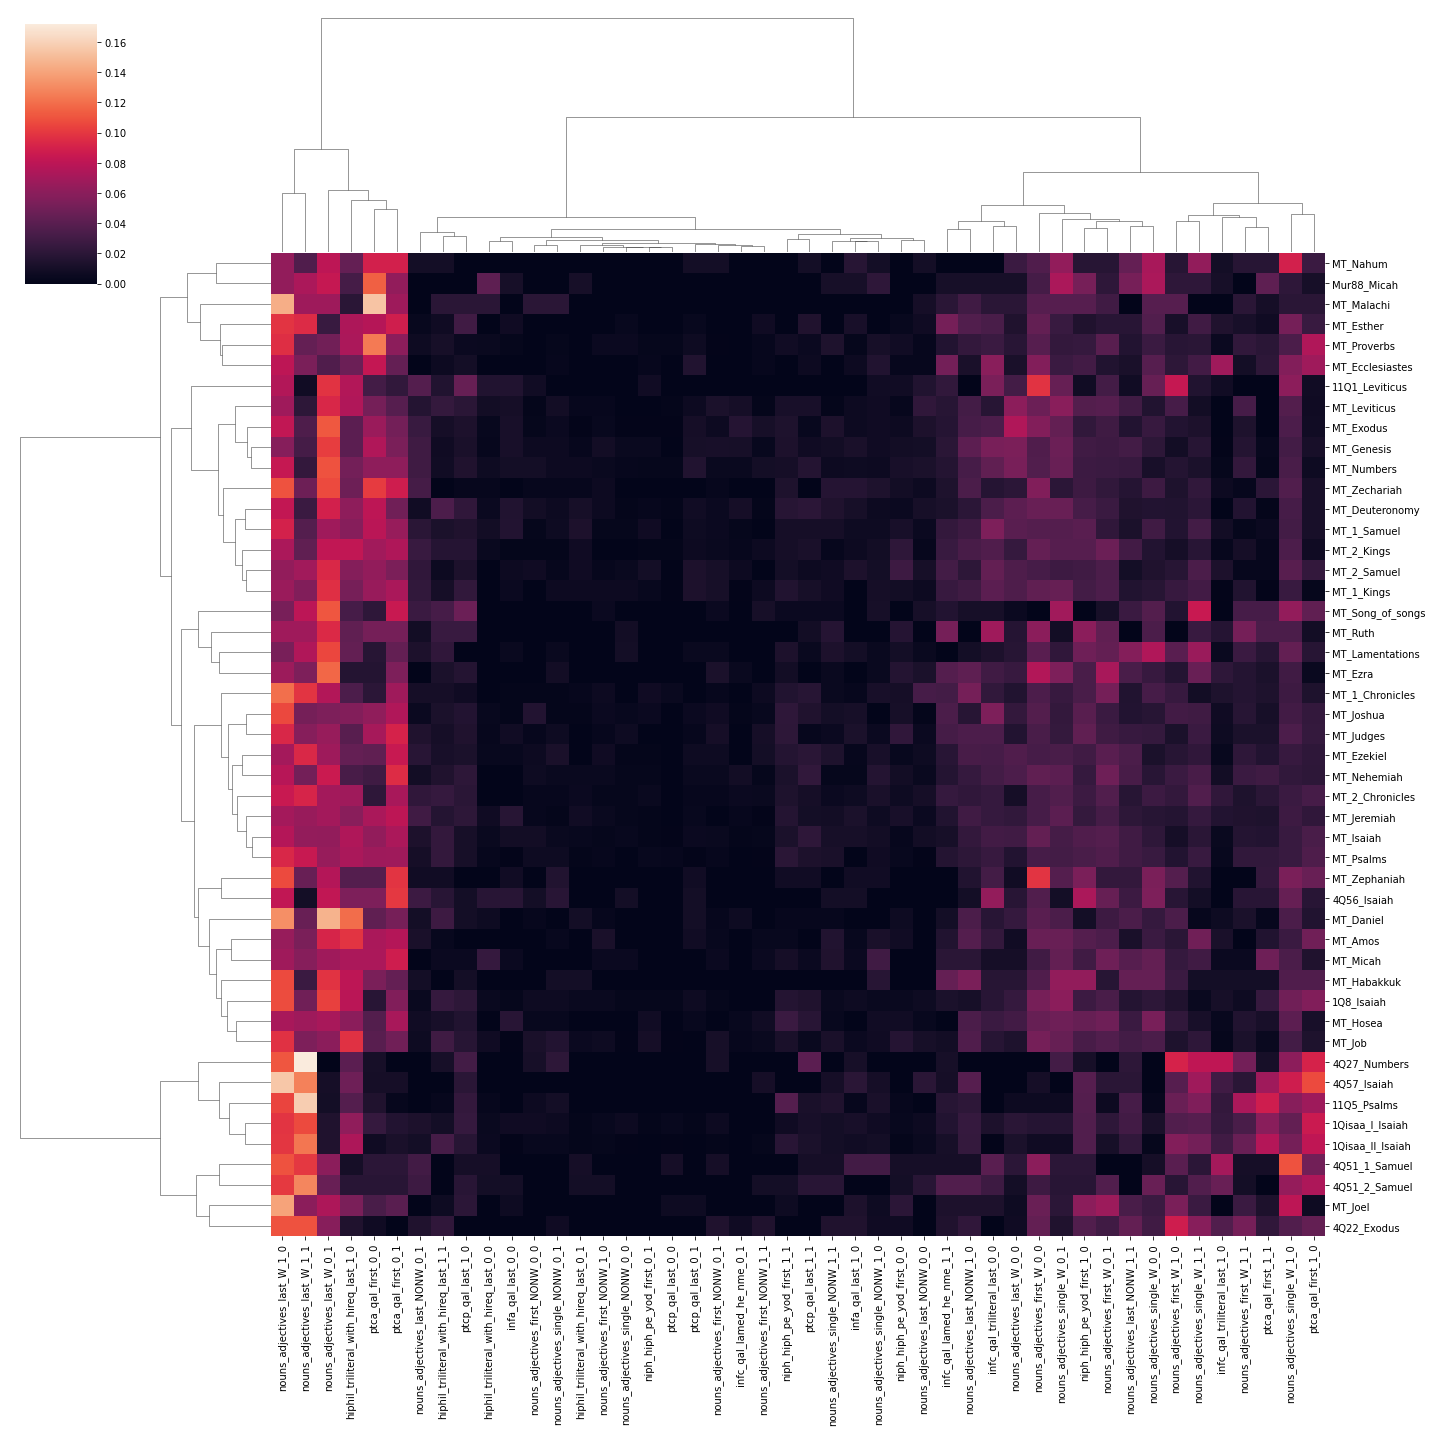

In [70]:
sns.clustermap(counts_norm,
               figsize = (20, 20), 
               method='ward', 
               metric='euclidean')

plt.savefig(f'hierarch_clust_counts_norm_heatmap_lex_cut_off{LEX_CUT_OFF}.png')

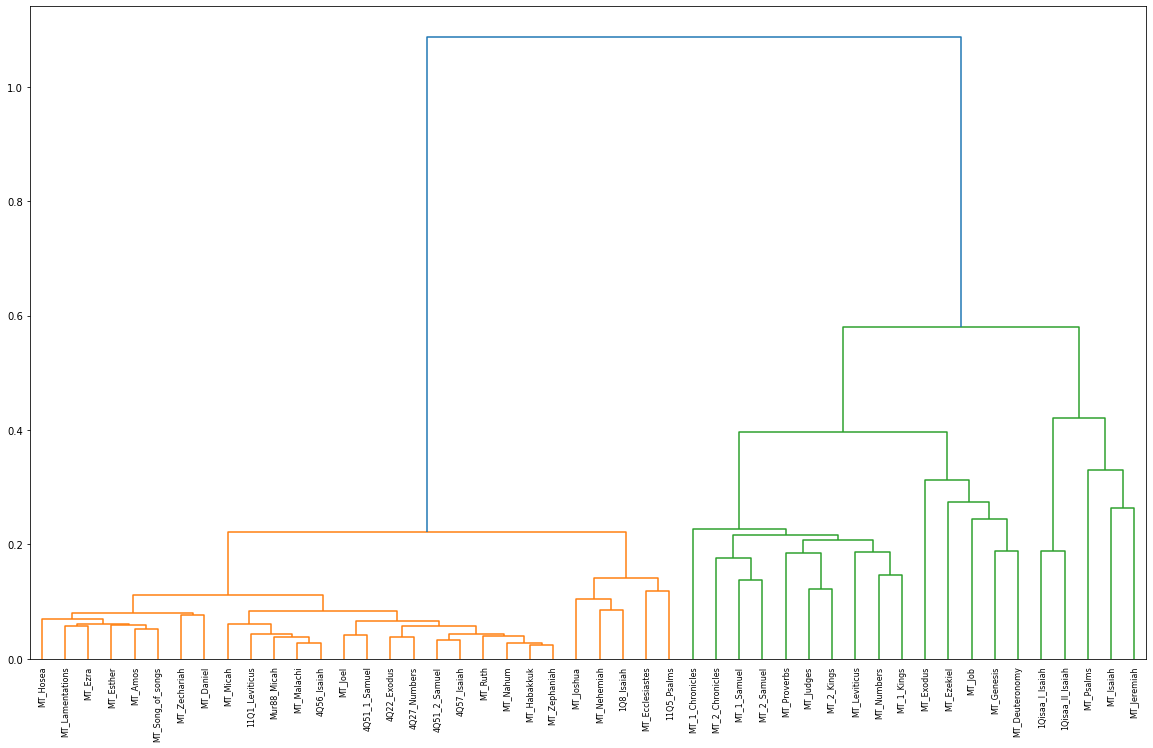

In [23]:
linkage_data = linkage(counts_norm_per_feature, method='ward', metric='euclidean')

plt.figure(figsize=(20, 12))
dendrogram(linkage_data, labels=counts.index)
#plt.show()

plt.savefig('hierarch_clust_counts_norm_per_feature.png')

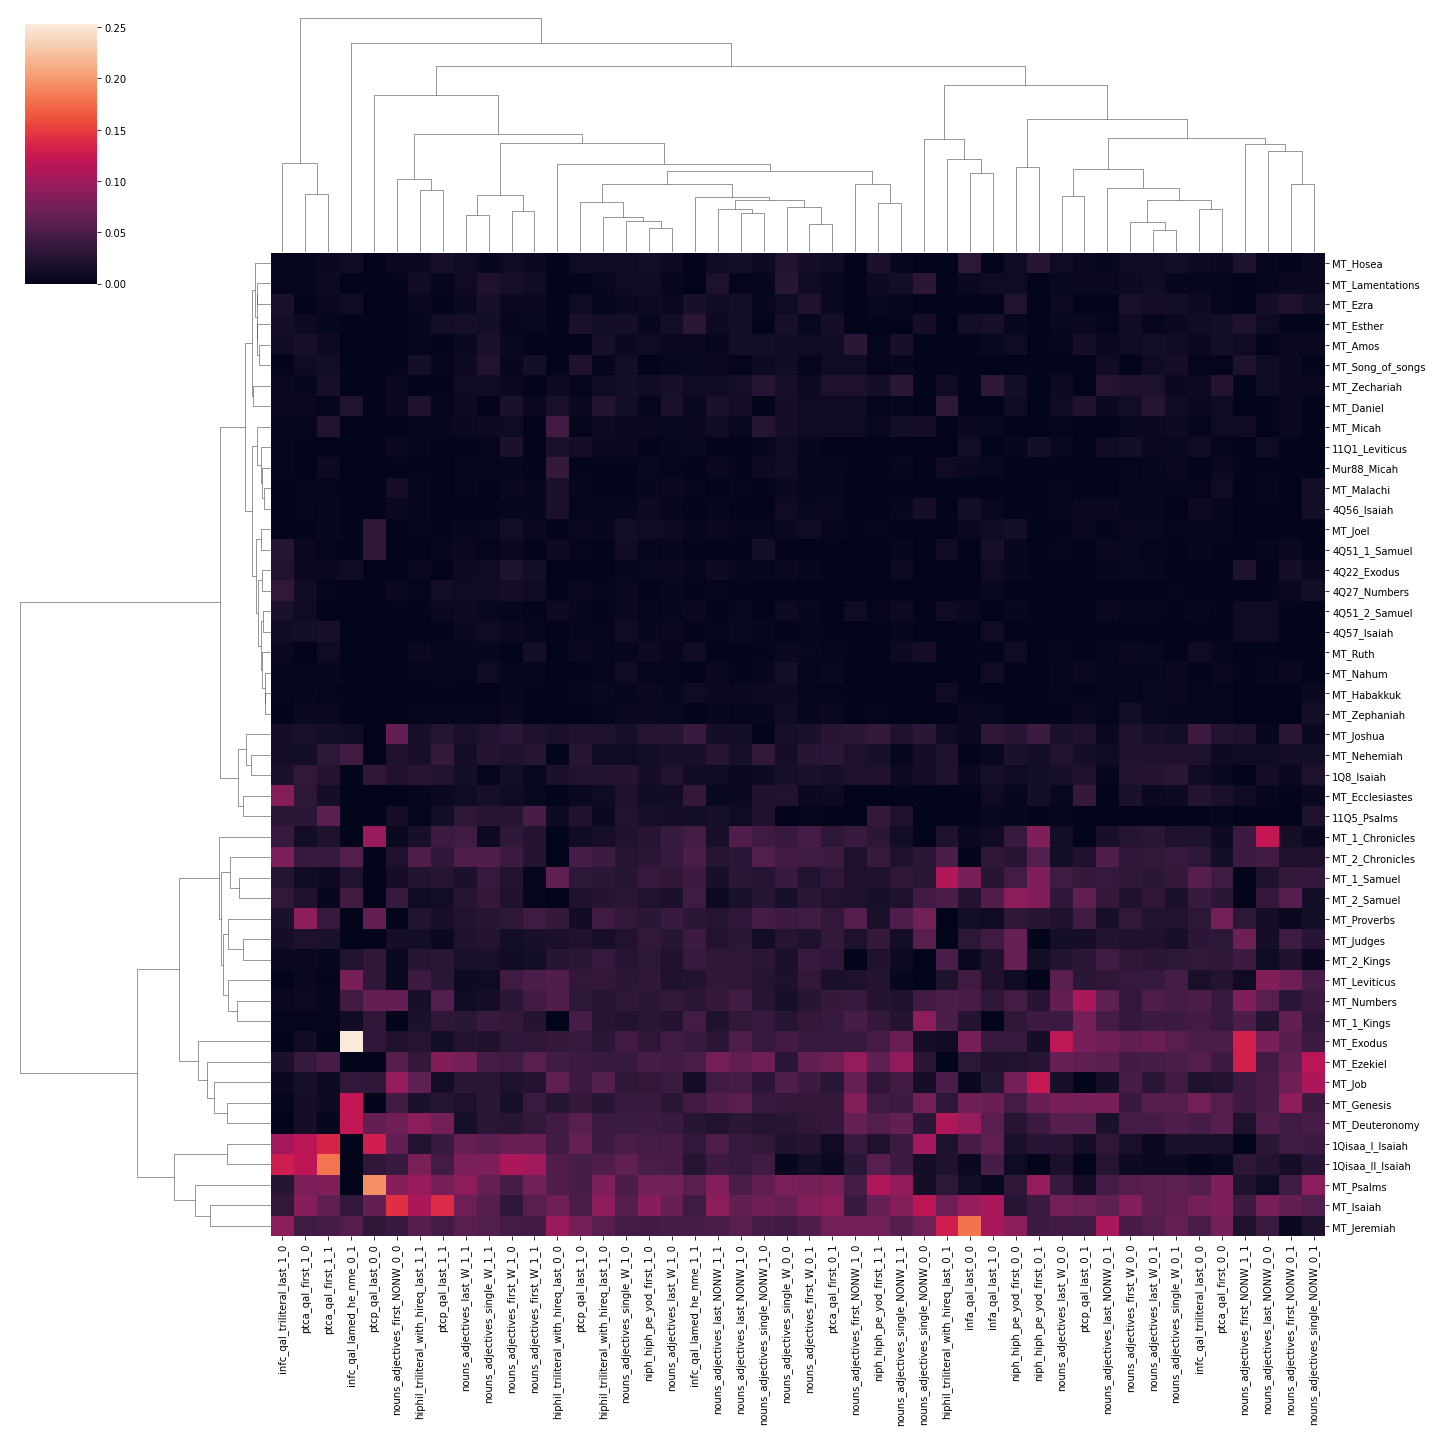

In [24]:
sns.clustermap(counts_norm_per_feature,
               figsize = (20, 20), 
               method='ward', 
               metric='euclidean')

plt.savefig('hierarch_clust_counts_norm_per_feature_heatmap.png')

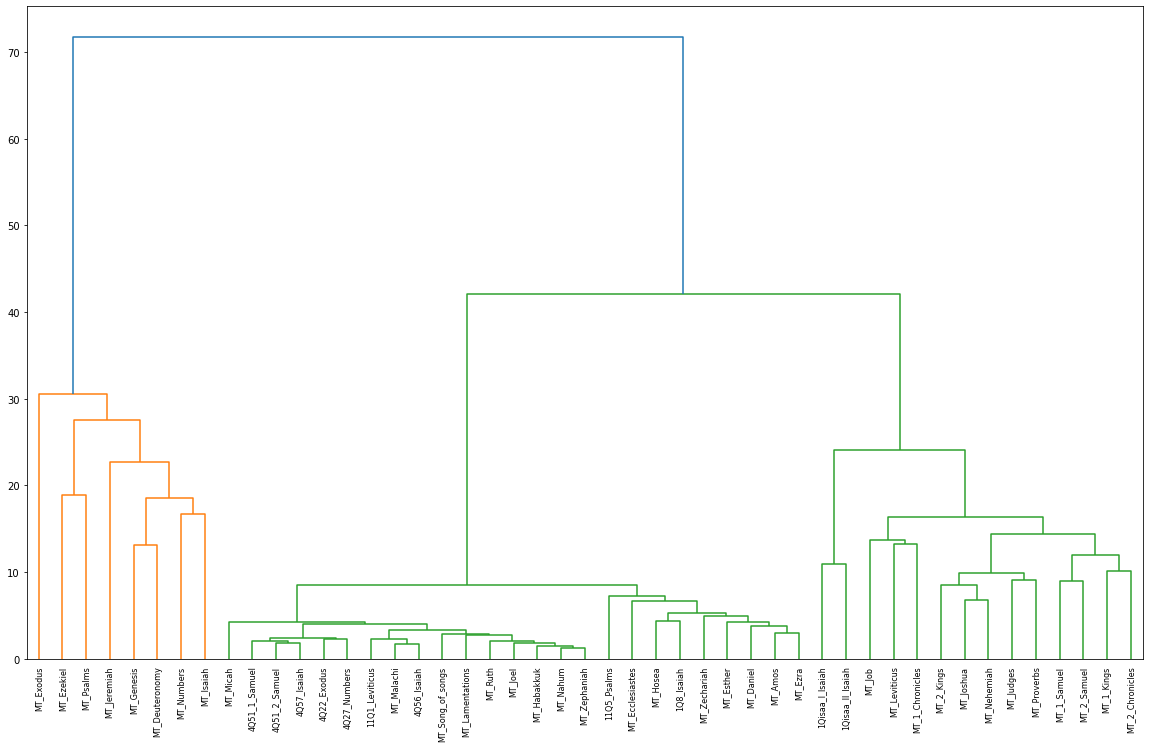

In [57]:
linkage_data = linkage(counts_tf_idf, method='ward', metric='euclidean')

plt.figure(figsize=(20, 12))
dendrogram(linkage_data, labels=counts.index)
plt.show()

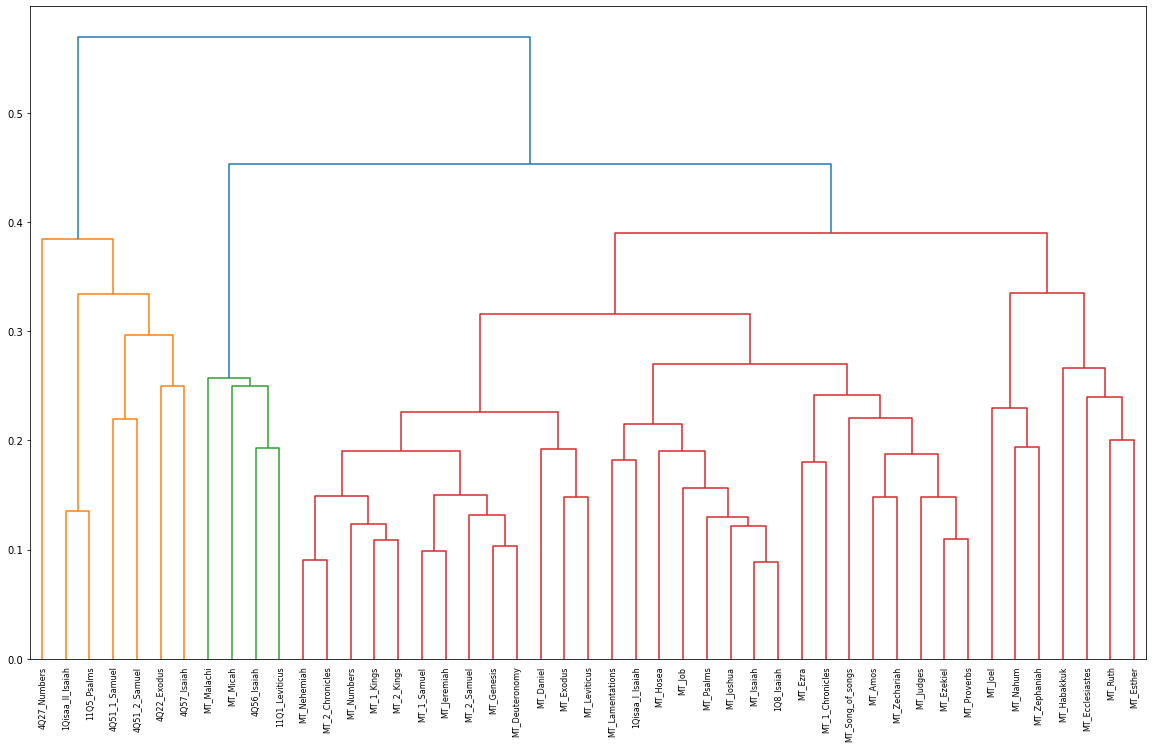

In [58]:
linkage_data = linkage(counts_tf_idf_norm, method='ward', metric='euclidean')

plt.figure(figsize=(20, 12))
dendrogram(linkage_data, labels=counts.index)
plt.show()

### KMEANS

In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(counts_norm)

In [389]:
y_km

array([0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1,
       2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 2, 2])

In [390]:
for book_scr, cluster in zip(counts_norm.index, y_km):
    print(book_scr, cluster)

MT_Genesis 0
MT_Exodus 0
MT_Leviticus 2
MT_Numbers 2
MT_Deuteronomy 0
MT_Joshua 2
MT_Judges 2
MT_1_Samuel 0
MT_2_Samuel 0
MT_1_Kings 0
MT_2_Kings 0
MT_Isaiah 2
MT_Jeremiah 2
MT_Ezekiel 2
MT_Hosea 2
MT_Joel 2
MT_Amos 2
MT_Jonah 0
MT_Micah 2
MT_Nahum 2
MT_Habakkuk 2
MT_Zephaniah 2
MT_Haggai 2
MT_Zechariah 2
MT_Malachi 2
MT_Psalms 2
MT_Job 2
MT_Proverbs 2
MT_Ruth 2
MT_Song_of_songs 1
MT_Ecclesiastes 2
MT_Lamentations 2
MT_Esther 2
MT_Daniel 0
MT_Ezra 0
MT_Nehemiah 0
MT_1_Chronicles 0
MT_2_Chronicles 0
SP_Genesis 0
SP_Exodus 0
SP_Leviticus 2
SP_Numbers 2
SP_Deuteronomy 0
1Qisaa_Isaiah 1
1Q8_Isaiah 2
4Q2_Genesis 0
4Q11_Exodus 0
4Q14_Exodus 2
4Q22_Exodus 2
4Q23_Numbers 2
4Q24_Leviticus 2
4Q27_Numbers 1
4Q30_Deuteronomy 0
4Q41_Deuteronomy 1
4Q51_1_Samuel 1
4Q51_2_Samuel 1
4Q55_Isaiah 2
4Q56_Isaiah 2
4Q57_Isaiah 1
4Q58_Isaiah 2
4Q70_Jeremiah 2
4Q72_Jeremiah 2
4Q83_Psalms 1
4Q84_Psalms 2
4Q137_Deuteronomy 1
8Q3_Deuteronomy 0
11Q1_Leviticus 2
11Q5_Psalms 1
Xq2_Deuteronomy 0
Mur88_Jonah 0
Mur88_M

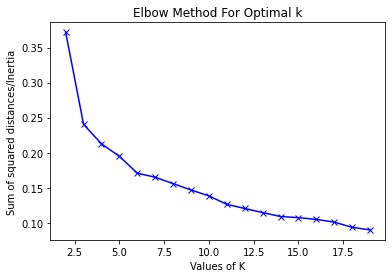

In [138]:
Sum_of_squared_distances = []
K = range(2,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0).fit(counts_norm)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()